# $Ceol$ $Rince$ $na$ $hÉireann$
## The Ceol Rince na hÉireann (CRÉ) corpus contains 1,224 Irish traditional dance tunes, each represented as a monophonic MIDI file.

Originally collected and published by [Breandán Breathnach][2] (1912-1985); transcribed to ABC Notation by [Bill Black][1]; corpus cleaned, annotated and converted to MIDI by Danny Diamond for Polifonia deliverable D3.1: Software Tools for Pattern Extraction.

This notebook explores the corpus, generating and visualizing some basic statistics on the content, including:
* Number of melodies in corpus.
* Distribution of key signature and time signature values across the corpus.
* Number of note events and number of bars per melody across the corpus.

## Prerequisites:

In <basepath>/MIDI we should have a corpus of folk tunes in MIDI format. By default basepath is ./corpus/. If the corpus is elsewhere, change basepath below. We will be writing outputs to subdirectories of basepath.

Install the libraries Matplotlib and Music21:

`pip install matplotlab music21`

[1]: http://www.capeirish.com/webabc
[2]: https://en.wikipedia.org/wiki/Breandán_Breathnach

In [4]:
import os.path
import sys
sys.path.append("corpus_processing_tools")

import music21
import os

Setup paths:

In [11]:
basepath = "./"
inpath = basepath + "/MIDI"
roots_path = basepath + "/roots.csv"

for path in [basepath, inpath, roots_path]:
    assert os.path.exists(path)

Import local corpus setup / analysis tools:

In [12]:
import setup_corpus.constants as constants
from setup_corpus.corpus_processing_tools import Music21Corpus, MusicDataCorpus

Instantiate Music21Corpus class (this will return the total number of MIDI files in CRÉ corpus, and list their titles):

In [13]:
cre_corpus = Music21Corpus(inpath)

Input corpus contains 1224 melodies:

Tureengarbh Jig, The
Young And Stylish
Fun at the Fair
Buckley the Fiddler  (reel)
Tommy Coen's Reel
Lynch's Hornpipe
Tuttle's Reel
Patrick O'Connor's  (polka)
Patsy Tuohey's (reel)
Beggarman's Reel, The
Up and About In the Morning  (slide)
My Love Between Two Roses (reel)
Ladies Step Up to Tea!
Old Pigeon on the Gate, The
Curragh Races (reel), The
Mangan's Fancy (reel)
McDonagh's Reel 1
One of Tommy's  (hornpipe)
Listowel Fiddler  (slide), The
John Flynn's Jig
Callan Lasses (reel), The
Knocknaboul Reel, The
Jackson's Post-Chaise
Father Skehan's Jig
Tom Connors' Jig
Sailor's Bonnet (reel), The
Pomeroy Fiddler  (reel), The
Her Golden Hair Was Curling Down
Frog in the Puddle , The
Tap the Barrel (reel)
Trip to Durrow (reel), The
Humors of Derrycros(s)ane, The
Nine Mile House  (reel)
Duke of Leinster Hornpipe, The
Mason's Apron (reel), The
Pat O'Beirne's Favorite
Gooseberry Bush (reel), The
Carty's Reel
Brother Gildas' Jig
Hunter's Purse (reel), The
L

Read all tunes from MIDI to the Music21 Python library $stream$ format for analysis:

In [14]:
cre_corpus.read_midi_files_to_streams()


1224 melodies successfully read to Music21 stream representation.


[<music21.stream.Score 0x12592efd0_flat>,
 <music21.stream.Score 0x125befee0_flat>,
 <music21.stream.Score 0x125d46d60_flat>,
 <music21.stream.Score 0x125f6c760_flat>,
 <music21.stream.Score 0x1260604f0_flat>,
 <music21.stream.Score 0x125d12d90_flat>,
 <music21.stream.Score 0x1262376a0_flat>,
 <music21.stream.Score 0x1264f89d0_flat>,
 <music21.stream.Score 0x1266dd970_flat>,
 <music21.stream.Score 0x126881f70_flat>,
 <music21.stream.Score 0x125cf2700_flat>,
 <music21.stream.Score 0x1266d6e20_flat>,
 <music21.stream.Score 0x1268d6f70_flat>,
 <music21.stream.Score 0x126a42d90_flat>,
 <music21.stream.Score 0x126b4ccd0_flat>,
 <music21.stream.Score 0x1268f6ee0_flat>,
 <music21.stream.Score 0x126da3cd0_flat>,
 <music21.stream.Score 0x125cf0d00_flat>,
 <music21.stream.Score 0x126c1bdf0_flat>,
 <music21.stream.Score 0x126f5bf70_flat>,
 <music21.stream.Score 0x12712ddc0_flat>,
 <music21.stream.Score 0x12727de20_flat>,
 <music21.stream.Score 0x1274fdee0_flat>,
 <music21.stream.Score 0x126881ac0

Extract root note for each tune in corpus:

In [89]:
roots = [tune.keySignature.tonic.name.upper() for tune in cre_corpus.melodies if tune.keySignature]
tune_names_roots = dict(zip(cre_corpus.titles, [str(note) for note in roots]))
for name, root in list(tune_names_roots.items())[:10]:
    print(f"{name}: {root}")
print("...")

Tureengarbh Jig, The: D
Young And Stylish: G
Fun at the Fair: G
Buckley the Fiddler  (reel): G
Tommy Coen's Reel: G
Lynch's Hornpipe: D
Tuttle's Reel: D
Patrick O'Connor's  (polka): A
Patsy Tuohey's (reel): E
Beggarman's Reel, The: E
...


Count and print occurrences of each root note across the corpus as raw totals

In [34]:
from collections import Counter
roots_histogram = dict(Counter(roots).most_common())
for root, count in roots_histogram.items():
    print(f"{root}: {count}")

G: 496
D: 428
A: 159
E: 116
C: 20
B: 4
F: 1
G: 40.52%
D: 34.97%
A: 12.99%
E: 9.48%
C: 1.63%
B: 0.33%
F: 0.08%


Count and print occurrences of root notes across the corpus as percentages:

In [35]:
for root, count in roots_histogram.items():
    print(f"{root}: {round(count / 1224 * 100, 2)}%")

G: 40.52%
D: 34.97%
A: 12.99%
E: 9.48%
C: 1.63%
B: 0.33%
F: 0.08%


Display occurrences of each root note across the corpus in chart:

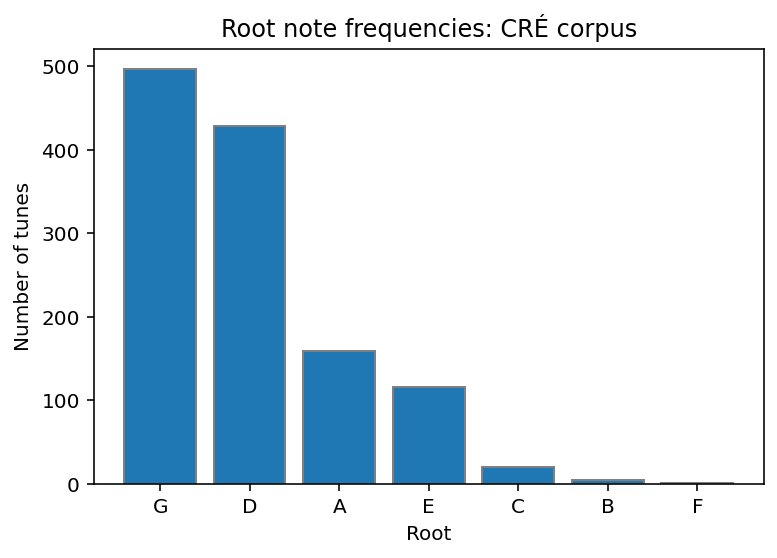

In [90]:
import matplotlib.pyplot as plt

plt.bar(list(roots_histogram.keys()), list(roots_histogram.values()), edgecolor='gray', linewidth=1)
plt.title('Root note frequencies: CRÉ corpus')
plt.xlabel('Root note name')
plt.ylabel('Number of tunes')
plt.show()

Extract time signature for each note in corpus:

In [91]:
time_sigs = [tune[music21.meter.TimeSignature][0].ratioString for tune in cre_corpus.melodies]
tune_names_time_sigs = dict(zip(cre_corpus.titles, [ts for ts in time_sigs]))
for name, ts in list(tune_names_time_sigs.items())[:10]:
    print(f"{name}: {ts}")
print("...")

Tureengarbh Jig, The: 6/8
Young And Stylish: 6/8
Fun at the Fair: 12/8
Buckley the Fiddler  (reel): 4/4
Tommy Coen's Reel: 4/4
Lynch's Hornpipe: 4/4
Tuttle's Reel: 4/4
Patrick O'Connor's  (polka): 2/4
Patsy Tuohey's (reel): 4/4
Beggarman's Reel, The: 4/4
...


Count and print occurrences of each time signature across the corpus as raw totals:

In [52]:
time_sigs_histogram = dict(Counter(time_sigs).most_common())
for ts, count in time_sigs_histogram.items():
    print(f"{ts}: {count}")

4/4: 730
6/8: 263
2/4: 84
12/8: 80
9/8: 52
2/2: 14
6/4: 1


Count and print occurrences of time signatures across the corpus as percentages:

In [53]:
for ts, count in time_sigs_histogram.items():
    print(f"{ts}: {round(count / 1224 * 100, 2)}%")

4/4: 59.64%
6/8: 21.49%
2/4: 6.86%
12/8: 6.54%
9/8: 4.25%
2/2: 1.14%
6/4: 0.08%


Display occurrences of each time signature across the corpus in chart:

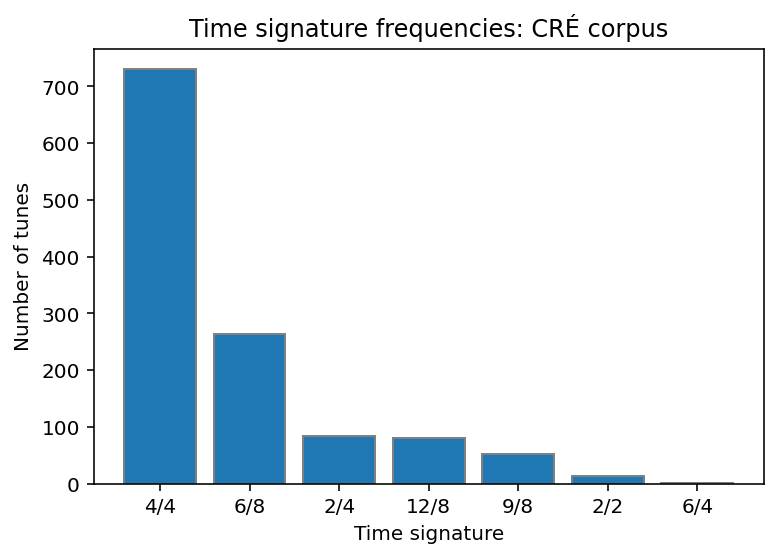

In [77]:
plt.bar(list(time_sigs_histogram.keys()), list(time_sigs_histogram.values()), edgecolor='gray', linewidth=1)
plt.title('Time signature frequencies: CRÉ corpus')
plt.xlabel('Time signature')
plt.ylabel('Number of tunes')
plt.show()

Convert to feature sequence format for further analysis:
NOTE: This call takes c. 10 minutes to run.

In [63]:
cre_corpus.derive_feat_seqs()

1224 melodies successfully converted to feature sequence representation.



[    MIDI_note  onset  duration velocity
 0          71    0.0       0.5      105
 1          69    0.5       0.5      105
 2          71    1.0       0.5       80
 3          73    1.5       0.5       80
 4          74    2.0       0.5       95
 ..        ...    ...       ...      ...
 163        76   93.0       0.5       80
 164        76   93.5       0.5      105
 165        74   94.0       0.5       80
 166        73   94.5       0.5       80
 167        74   95.0       1.0       95
 
 [168 rows x 4 columns],
     MIDI_note  onset  duration velocity
 0          69   0.00      0.25      105
 1          71   0.25      0.25       80
 2          72   0.50      1.00      105
 3          69   1.50      0.50       80
 4          71   2.00      0.50       95
 ..        ...    ...       ...      ...
 175        72  93.00      0.50       80
 176        74  93.50      0.50      105
 177        71  94.00      0.50       80
 178        67  94.50      0.50       80
 179        69  95.00      1.0

Calculate and print distribution of tune lengths across the corpus, as measured by number of note events per tune.

In [64]:
tune_lengths = [len(tune) for tune in cre_corpus.feat_seqs]
tune_length_histogram = dict(Counter(tune_lengths).most_common())
for length, count in tune_length_histogram.items():
    print(f"{length} note events: {count}")

118 note events: 33
114 note events: 29
122 note events: 25
119 note events: 24
116 note events: 23
124 note events: 23
184 note events: 21
121 note events: 20
236 note events: 20
188 note events: 20
117 note events: 20
126 note events: 19
120 note events: 18
128 note events: 18
248 note events: 18
132 note events: 18
238 note events: 17
180 note events: 16
178 note events: 16
115 note events: 16
123 note events: 15
244 note events: 15
112 note events: 15
182 note events: 15
228 note events: 14
246 note events: 14
125 note events: 14
242 note events: 14
174 note events: 14
172 note events: 13
230 note events: 13
232 note events: 13
113 note events: 13
160 note events: 12
226 note events: 12
252 note events: 12
140 note events: 12
256 note events: 11
234 note events: 11
240 note events: 11
111 note events: 11
250 note events: 10
176 note events: 10
224 note events: 10
186 note events: 10
162 note events: 9
127 note events: 9
166 note events: 9
110 note events: 9
164 note events: 9
150 n

Calculate and print number of note events per tune in corpus as percentages:

In [67]:
for length, count in tune_length_histogram.items():
    count = round(count / 1224 * 100, 2)
    print(f"{length} note events: {count}%")


118: 2.7%
114: 2.37%
122: 2.04%
119: 1.96%
116: 1.88%
124: 1.88%
184: 1.72%
121: 1.63%
236: 1.63%
188: 1.63%
117: 1.63%
126: 1.55%
120: 1.47%
128: 1.47%
248: 1.47%
132: 1.47%
238: 1.39%
180: 1.31%
178: 1.31%
115: 1.31%
123: 1.23%
244: 1.23%
112: 1.23%
182: 1.23%
228: 1.14%
246: 1.14%
125: 1.14%
242: 1.14%
174: 1.14%
172: 1.06%
230: 1.06%
232: 1.06%
113: 1.06%
160: 0.98%
226: 0.98%
252: 0.98%
140: 0.98%
256: 0.9%
234: 0.9%
240: 0.9%
111: 0.9%
250: 0.82%
176: 0.82%
224: 0.82%
186: 0.82%
162: 0.74%
127: 0.74%
166: 0.74%
110: 0.74%
164: 0.74%
150: 0.65%
107: 0.65%
108: 0.65%
134: 0.65%
136: 0.65%
243: 0.65%
130: 0.65%
175: 0.65%
168: 0.57%
181: 0.57%
104: 0.57%
190: 0.57%
192: 0.57%
149: 0.57%
163: 0.49%
131: 0.49%
158: 0.49%
262: 0.49%
235: 0.49%
196: 0.49%
258: 0.41%
231: 0.41%
247: 0.41%
138: 0.41%
179: 0.41%
245: 0.41%
156: 0.41%
144: 0.41%
146: 0.41%
152: 0.41%
170: 0.41%
129: 0.41%
266: 0.33%
171: 0.33%
200: 0.33%
195: 0.33%
105: 0.33%
227: 0.33%
270: 0.33%
183: 0.33%
229: 0.33%
159:

Display tune length distribution as bar chart:

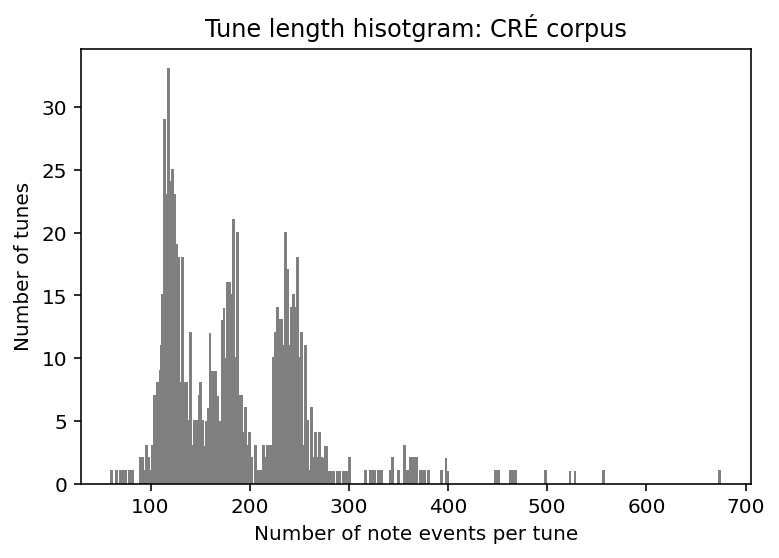

In [85]:
plt.bar(list(tune_length_histogram.keys()), list(tune_length_histogram.values()), edgecolor='gray', linewidth=1)

plt.title('Tune length distribution chart: CRÉ corpus')
plt.xlabel('Number of note events per tune')
plt.ylabel('Number of tunes')
plt.show()

Calculate and print distribution of number of bars per tune across the corpus:

In [79]:
import utils

filtered_seqs = [utils.filter_dataframe(seq, seq='velocity', threshold=100) for seq in cre_corpus.feat_seqs]
bar_counts = [len(seq) for seq in filtered_seqs]
bar_count_histogram = dict(Counter(bar_counts).most_common())

for num_bars, count in bar_count_histogram.items():
    print(f"{num_bars} bars: {count}")

33 bars: 423
16 bars: 246
17 bars: 206
32 bars: 160
49 bars: 28
24 bars: 26
25 bars: 22
18 bars: 16
34 bars: 13
26 bars: 11
48 bars: 10
40 bars: 6
31 bars: 6
50 bars: 6
41 bars: 5
66 bars: 5
19 bars: 4
65 bars: 4
64 bars: 3
21 bars: 2
47 bars: 2
56 bars: 2
81 bars: 2
97 bars: 2
39 bars: 2
63 bars: 2
44 bars: 1
8 bars: 1
9 bars: 1
35 bars: 1
13 bars: 1
20 bars: 1
12 bars: 1
57 bars: 1
28 bars: 1
15 bars: 1


Calculate and print distribution of number of bars per tune as percentages:

In [80]:
for num_bars, count in bar_count_histogram.items():
    count = round(count / 1224 * 100, 2)
    print(f"{num_bars} bars: {count}%")

33 bars: 34.56%
16 bars: 20.1%
17 bars: 16.83%
32 bars: 13.07%
49 bars: 2.29%
24 bars: 2.12%
25 bars: 1.8%
18 bars: 1.31%
34 bars: 1.06%
26 bars: 0.9%
48 bars: 0.82%
40 bars: 0.49%
31 bars: 0.49%
50 bars: 0.49%
41 bars: 0.41%
66 bars: 0.41%
19 bars: 0.33%
65 bars: 0.33%
64 bars: 0.25%
21 bars: 0.16%
47 bars: 0.16%
56 bars: 0.16%
81 bars: 0.16%
97 bars: 0.16%
39 bars: 0.16%
63 bars: 0.16%
44 bars: 0.08%
8 bars: 0.08%
9 bars: 0.08%
35 bars: 0.08%
13 bars: 0.08%
20 bars: 0.08%
12 bars: 0.08%
57 bars: 0.08%
28 bars: 0.08%
15 bars: 0.08%


Display number of bars per tune as histogram:

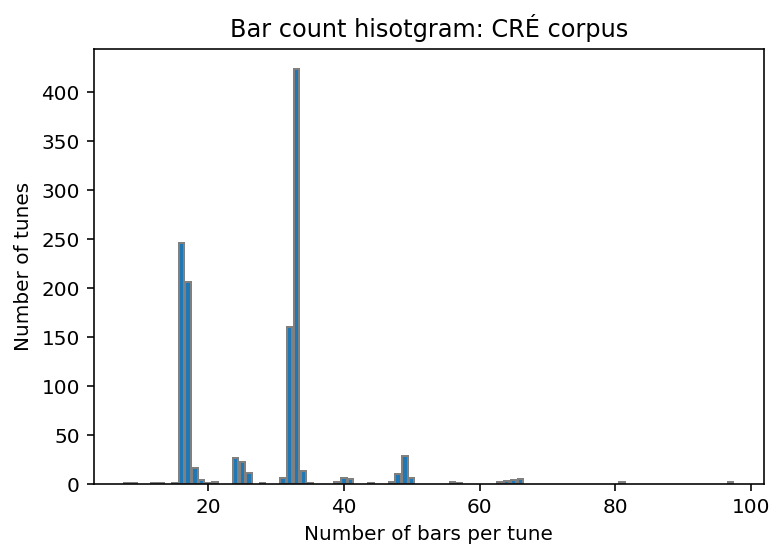

In [86]:
plt.bar(list(bar_count_histogram.keys()), list(bar_count_histogram.values()), edgecolor='gray', linewidth=1)

plt.title('Bar count hisotgram: CRÉ corpus')
plt.xlabel('Number of bars per tune')
plt.ylabel('Number of tunes')
plt.show()







